In [1]:
import matplotlib.pyplot as pl
import numpy as np
from IPython.core.display import HTML

Plot a figure you want to embed.

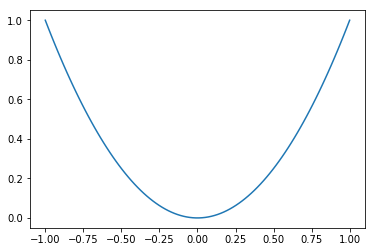

In [2]:
fig, ax = pl.subplots()
xxx = np.linspace(-1, 1, 100)
ax.plot(xxx, xxx**2)

### Generate a `html` containing the image

In [3]:
from piplot.fig2html import fig2html


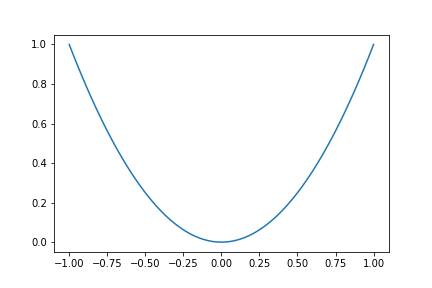

In [4]:
html = f"""
<!DOCTYPE html>
<html>
<body>
<p>This is your image:</p>
{fig2html(fig)}
</body>
</html>
"""
HTML(html)

# Example with mako and figure_retriever

Long time ago you wrote a method that draws a couple of images:

In [5]:
def method_generating_several_figures():
    for n in [2, 3]:
        fig, ax = pl.subplots()
        xxx = np.linspace(-1, 1, 100)
        ax.plot(xxx, xxx**n)
        fig.suptitle(f"polynomial of order {n}")

You can capture the images:

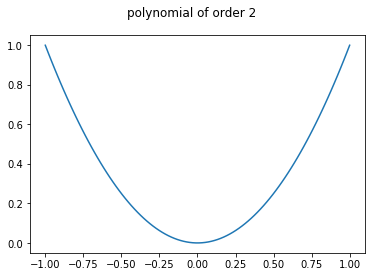

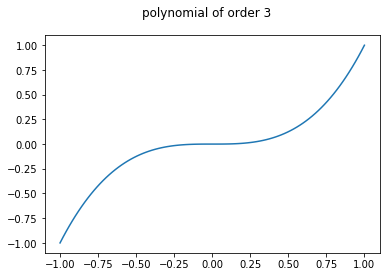

In [6]:
from piplot.figure_retriever import FigureRetriever

with FigureRetriever() as my_figs:
    method_generating_several_figures()

Now create a simple `mako` template accepting as an argument a list of figures and plotting them all.


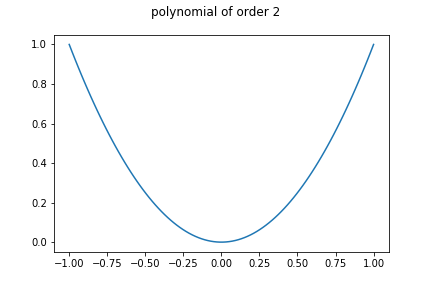
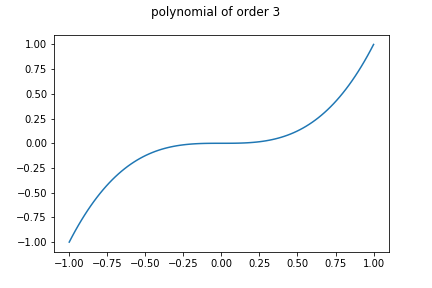

In [7]:
from mako.template import Template

template = Template("""
<%
from piplot.fig2html import fig2html
%>
<!DOCTYPE html>
<html>
<body>
<p>These are your figures:</p>
% for fig in fig_list:
${fig2html(fig)}
% endfor
</body>
</html>
""")
HTML(template.render(fig_list = my_figs))